1. Here I use the premade modules to read in, clean input data,

2. Then, from  https://github.com/bukosabino/ta I use the ta library to get certain technical indicators required to generate trading signals for two trading strategies: the RSI and BB

3. Afterwards, I generate financial results of backtesting using a custom financial-evaluation module

## Contents

[0. Dependencies](#sec1)

[1. Data cleaning](#sec2)

[2. Technical Indicators \& Strategies](#sec3)

[3. Save Results](#sec4)

## 0. Dependencies
<a id = 'sec1'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

import sys
sys.path.append('../utils/')
import data_cleaning 
import get_data
from visualize import ts_with_markers

from ta.momentum import rsi
from ta.volatility import bollinger_lband_indicator, bollinger_hband_indicator

## 1. Data cleaning
<a id = 'sec2'></a>

### Data related parameter settings


In [2]:
TestVarNames = []
assets= 'Testing'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

datas_test = []

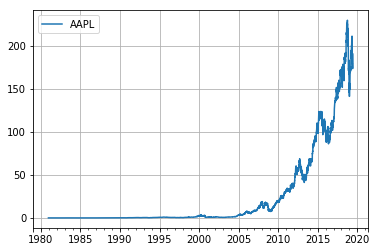

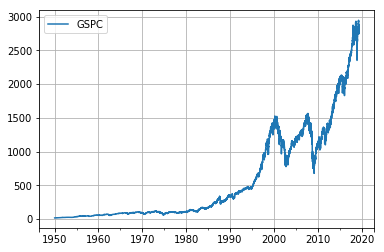

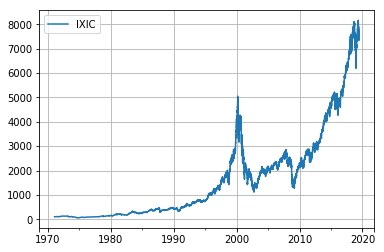

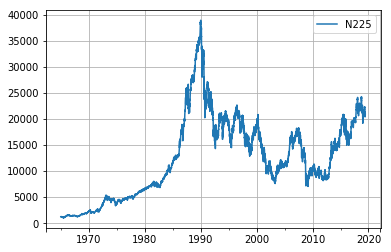

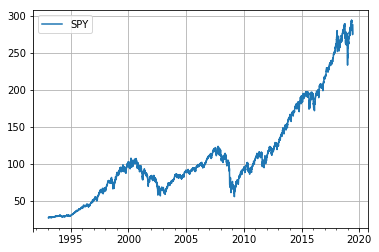

In [3]:
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    TestVarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas_test.append(df)
    
    df.plot(grid = True)

## Creating the 3 subsets corresponding to the 3 testing periods:

1. Test 1: 2005-12-05 to 2006-12-31
2. Test 2: 2008-12-04 to 2009-12-31
3. Test 3: 2018-05-04 to 2019-06-07

### Test 1

In [4]:
first_date_te1 = "2005-12-05"
last_date_te1 = "2006-12-31"
print("Date from " + str(first_date_te1) + " to " + last_date_te1)

Date from 2005-12-05 to 2006-12-31


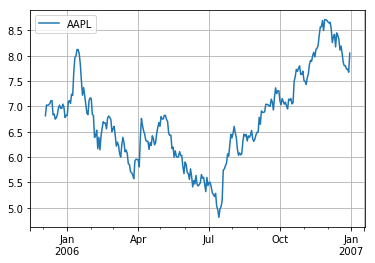

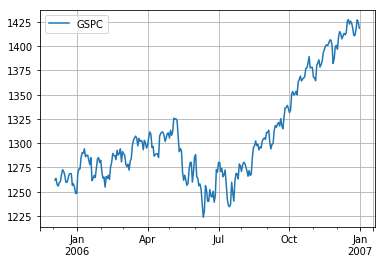

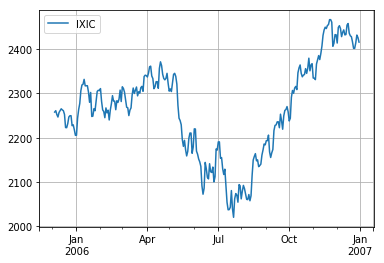

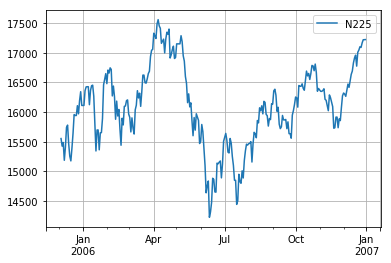

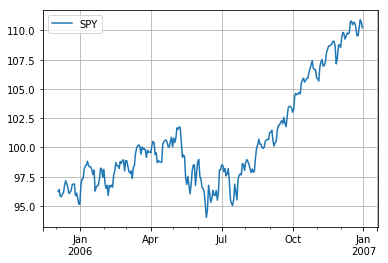

In [5]:
datas_test1 = []
for data in datas_test:
    datas_test1.append(data.loc[first_date_te1:last_date_te1])
    data.loc[first_date_te1:last_date_te1].plot(grid = True)

### Test 2

In [6]:
first_date_te2 = "2008-12-04"
last_date_te2 = "2009-12-31"

print("Date from " + str(first_date_te2) + " to " + last_date_te2)

Date from 2008-12-04 to 2009-12-31


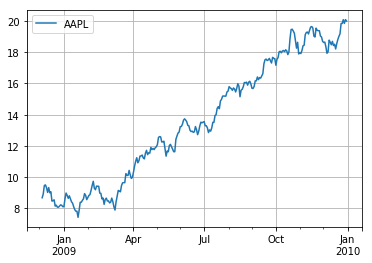

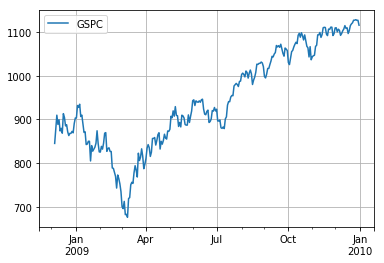

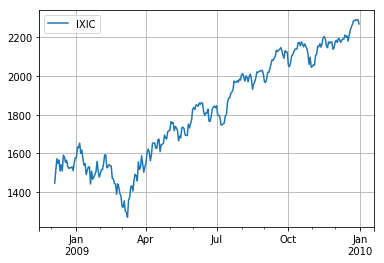

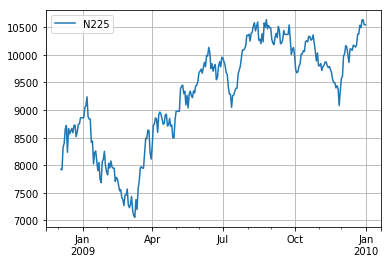

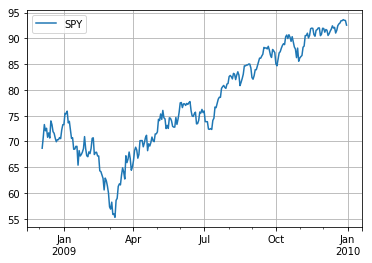

In [7]:
datas_test2 = []
for data in datas_test:
    datas_test2.append(data.loc[first_date_te2:last_date_te2])
    data.loc[first_date_te2:last_date_te2].plot(grid = True)

### Test 3

In [8]:
first_date_te3 = "2018-05-04"
last_date_te3 = "2019-06-07"
print("Date from " + str(first_date_te3) + " to " + last_date_te3)

Date from 2018-05-04 to 2019-06-07


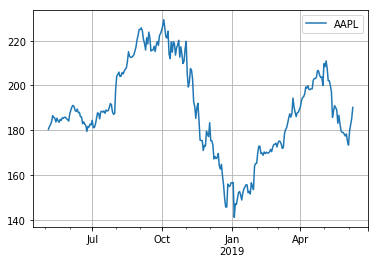

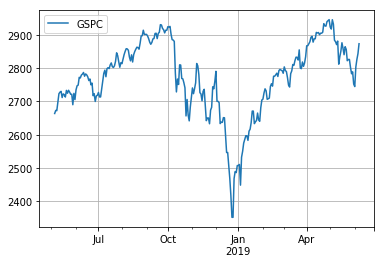

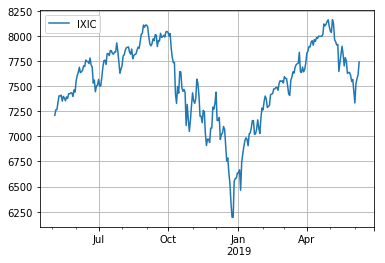

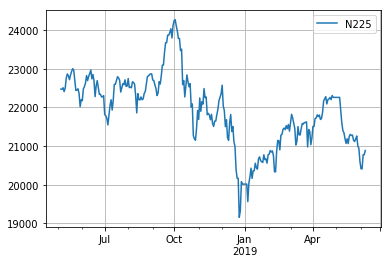

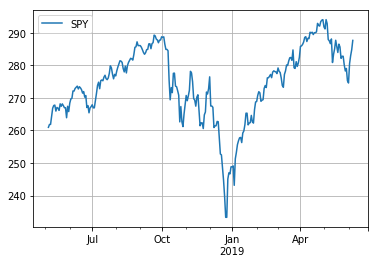

In [9]:
datas_test3 = []
for data in datas_test:
    datas_test3.append(data.loc[first_date_te3:last_date_te3])
    data.loc[first_date_te3:last_date_te3].plot(grid = True)

## 2. Technical Indicators and Startegies
<a id = 'sec3'></a>

### Adding RSI & Bollinger Band Indicators

#### Test 1

In [10]:
for idx, data in enumerate(datas_test1):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
    
    print(data.describe())


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  280.000000  260.000000         280.000000        280.000000
mean     6.741534   52.635194           0.057143          0.032143
std      0.876101   15.239679           0.232531          0.176695
min      4.808185   24.905596           0.000000          0.000000
25%      6.132167   40.057366           0.000000          0.000000
50%      6.697962   51.729858           0.000000          0.000000
75%      7.171000   65.562782           0.000000          0.000000
max      8.712048   84.954316           1.000000          1.000000
              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   280.000000  260.000000         280.000000        280.000000
mean   1307.030930   56.519084           0.046429          0.021429
std      51.100313   11.979814           0.210788          0.145067
min    1223.689941   23.930690           0.000000          0.000000
25%    1268.765045   47.874316           0.000000        

#### Test 2

In [11]:
for idx, data in enumerate(datas_test2):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
    
    print(data.describe())


             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  281.000000  261.000000         281.000000        281.000000
mean    13.525112   60.645834           0.078292          0.010676
std      3.906846   12.749156           0.269110          0.102956
min      7.420563   25.159037           0.000000          0.000000
25%      9.462646   50.919403           0.000000          0.000000
50%     13.223218   62.378541           0.000000          0.000000
75%     17.512344   69.704537           0.000000          0.000000
max     20.082972   86.822607           1.000000          1.000000


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   281.000000  261.000000         281.000000        281.000000
mean    943.132170   55.458502           0.042705          0.024911
std     112.485915   12.599786           0.202551          0.156132
min     676.530029   22.307881           0.000000          0.000000
25%     863.159973   47.874264           0.000000          0.000000
50%     920.260010   56.607670           0.000000          0.000000
75%    1046.500000   64.304027           0.000000          0.000000
max    1127.780029   81.266743           1.000000          1.000000
              IXIC         RSI  bb_high_indicator  bb_low_indicator
count   281.000000  261.000000         281.000000        281.000000
mean   1822.254663   57.229820           0.053381          0.017794
std     272.283179   12.123336           0.225193          0.132436
min    1268.640015   25.623213           0.000000          0.000000
25%    1564.319946   49.326521           0.00000

#### Test 3

In [12]:
for idx, data in enumerate(datas_test3):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
    
    print(data.describe())


             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  286.000000  266.000000         286.000000        286.000000
mean   188.830600   54.539280           0.087413          0.048951
std     20.365409   17.489860           0.282934          0.216144
min    141.039642   18.917244           0.000000          0.000000
25%    175.196689   40.025572           0.000000          0.000000
50%    187.412216   53.963838           0.000000          0.000000
75%    204.776711   70.036389           0.000000          0.000000
max    229.392090   89.016332           1.000000          1.000000

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http


              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   286.000000  266.000000         286.000000        286.000000
mean   2770.937273   54.623713           0.034965          0.048951
std     112.064604   14.794097           0.184013          0.216144
min    2351.100098   12.052927           0.000000          0.000000
25%    2713.992493   43.382399           0.000000          0.000000
50%    2783.734986   58.809352           0.000000          0.000000
75%    2857.032532   66.606535           0.000000          0.000000
max    2945.830078   76.762858           1.000000          1.000000
              IXIC         RSI  bb_high_indicator  bb_low_indicator
count   286.000000  266.000000         286.000000        286.000000
mean   7541.843180   54.434238           0.045455          0.052448
std     394.606329   15.126488           0.208664          0.223319
min    6192.919922   13.659979           0.000000          0.000000
25%    7329.430054   42.719110           0.0000

### Add Buy-Sell Signals

#### Test 1

In [13]:
for data in datas_test1:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/p

                AAPL        RSI  bb_high_indicator  bb_low_indicator  \
2006-10-23  7.729915  74.583033                1.0               0.0   
2006-10-24  7.691009  71.977208                1.0               0.0   
2006-10-25  7.750791  73.546855                0.0               0.0   
2006-10-26  7.799183  74.809265                0.0               0.0   
2006-10-27  7.630277  63.178021                0.0               0.0   
2006-10-30  7.631226  63.213538                0.0               0.0   
2006-10-31  7.693855  65.631628                0.0               0.0   
2006-11-01  7.511662  54.180477                0.0               0.0   
2006-11-02  7.494581  53.218324                0.0               0.0   
2006-11-03  7.429106  49.494521                0.0               0.0   
2006-11-06  7.563855  56.429343                0.0               0.0   
2006-11-07  7.639767  59.861073                0.0               0.0   
2006-11-08  7.823857  66.857679                0.0              

                   IXIC        RSI  bb_high_indicator  bb_low_indicator  \
2006-10-23  2355.560059  69.689844                0.0               0.0   
2006-10-24  2344.840088  63.788149                0.0               0.0   
2006-10-25  2356.590088  67.157550                0.0               0.0   
2006-10-26  2379.100098  72.563108                0.0               0.0   
2006-10-27  2350.620117  58.986602                0.0               0.0   
2006-10-30  2363.770020  62.561315                0.0               0.0   
2006-10-31  2366.709961  63.350654                0.0               0.0   
2006-11-01  2334.350098  50.418601                0.0               0.0   
2006-11-02  2334.020020  50.302835                0.0               0.0   
2006-11-03  2330.790039  49.083896                0.0               0.0   
2006-11-06  2365.949951  60.577310                0.0               0.0   
2006-11-07  2375.879883  63.172283                0.0               0.0   
2006-11-08  2384.939941  

                   SPY        RSI  bb_high_indicator  bb_low_indicator  \
2006-10-23  106.407471  79.875255                0.0               0.0   
2006-10-24  106.724861  81.919428                0.0               0.0   
2006-10-25  107.088669  83.980869                0.0               0.0   
2006-10-26  107.421486  85.636686                0.0               0.0   
2006-10-27  106.748070  69.557593                0.0               0.0   
2006-10-30  106.670677  67.937298                0.0               0.0   
2006-10-31  106.655220  67.589746                0.0               0.0   
2006-11-01  105.935349  53.501106                0.0               0.0   
2006-11-02  105.873405  52.461100                0.0               0.0   
2006-11-03  105.687645  49.285602                0.0               0.0   
2006-11-06  106.879662  64.518251                0.0               0.0   
2006-11-07  107.289917  68.156573                0.0               0.0   
2006-11-08  107.522125  70.076137     

#### Test 2

In [14]:
for data in datas_test2:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

                 AAPL        RSI  bb_high_indicator  bb_low_indicator  \
2009-10-23  19.352299  76.653034                0.0               0.0   
2009-10-26  19.213760  71.911990                0.0               0.0   
2009-10-27  18.728867  58.027805                0.0               0.0   
2009-10-28  18.257256  48.054163                0.0               0.0   
2009-10-29  18.632076  54.868205                0.0               0.0   
2009-10-30  17.887169  42.595007                0.0               0.0   
2009-11-02  17.964035  44.023059                0.0               0.0   
2009-11-03  17.910894  43.201843                0.0               0.0   
2009-11-04  18.106371  47.205851                0.0               0.0   
2009-11-05  18.411924  52.937650                0.0               0.0   
2009-11-06  18.441341  53.475137                0.0               0.0   
2009-11-09  19.116974  63.931869                0.0               0.0   
2009-11-10  19.261209  65.748298                0.0

                   IXIC        RSI  bb_high_indicator  bb_low_indicator  \
2009-10-23  2154.469971  56.430121                0.0               0.0   
2009-10-26  2141.850098  51.747649                0.0               0.0   
2009-10-27  2116.090088  43.587740                0.0               0.0   
2009-10-28  2059.610107  31.536687                0.0               0.0   
2009-10-29  2097.550049  43.196766                0.0               0.0   
2009-10-30  2045.109985  34.278220                0.0               1.0   
2009-11-02  2049.199951  35.427465                0.0               0.0   
2009-11-03  2057.320068  37.813665                0.0               0.0   
2009-11-04  2055.520020  37.474368                0.0               0.0   
2009-11-05  2105.320068  50.936209                0.0               0.0   
2009-11-06  2112.439941  52.550515                0.0               0.0   
2009-11-09  2154.060059  60.868975                0.0               0.0   
2009-11-10  2151.080078  

                  SPY        RSI  bb_high_indicator  bb_low_indicator  \
2009-10-23  89.289566  53.979987                0.0               0.0   
2009-10-26  88.322983  47.432338                0.0               0.0   
2009-10-27  87.918167  44.910678                0.0               0.0   
2009-10-28  86.257622  36.188238                0.0               0.0   
2009-10-29  88.108192  48.506773                0.0               0.0   
2009-10-30  85.555389  37.476332                0.0               0.0   
2009-11-02  86.183250  41.116299                0.0               0.0   
2009-11-03  86.455887  42.716841                0.0               0.0   
2009-11-04  86.678970  44.091198                0.0               0.0   
2009-11-05  88.273399  52.999232                0.0               0.0   
2009-11-06  88.504723  54.170162                0.0               0.0   
2009-11-09  90.520538  63.038982                0.0               0.0   
2009-11-10  90.537048  63.103616                0.0

#### Test 3

In [15]:
for data in datas_test3:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

                  AAPL        RSI  bb_high_indicator  bb_low_indicator  \
2019-04-01  190.506363  66.975397                0.0               0.0   
2019-04-02  193.275696  71.336572                0.0               0.0   
2019-04-03  194.600601  73.207489                0.0               0.0   
2019-04-04  194.939301  73.692665                0.0               0.0   
2019-04-05  196.244263  75.576095                0.0               0.0   
2019-04-08  199.332382  79.428265                0.0               0.0   
2019-04-09  198.734680  76.835815                0.0               0.0   
2019-04-10  199.850372  78.297237                0.0               0.0   
2019-04-11  198.186783  70.923061                0.0               0.0   
2019-04-12  198.107086  70.571131                0.0               0.0   
2019-04-15  198.465714  71.279928                0.0               0.0   
2019-04-16  198.485641  71.322346                0.0               0.0   
2019-04-17  202.350754  78.218940     

                   IXIC        RSI  bb_high_indicator  bb_low_indicator  \
2019-04-01  7828.910156  66.739641                0.0               0.0   
2019-04-02  7848.689941  67.937856                0.0               0.0   
2019-04-03  7895.549805  70.701594                0.0               0.0   
2019-04-04  7891.779785  70.163788                0.0               0.0   
2019-04-05  7938.689941  72.989441                0.0               0.0   
2019-04-08  7953.879883  73.874939                0.0               0.0   
2019-04-09  7909.279785  66.771178                0.0               0.0   
2019-04-10  7964.240234  70.619180                0.0               0.0   
2019-04-11  7947.359863  67.948052                0.0               0.0   
2019-04-12  7984.160156  70.625254                0.0               0.0   
2019-04-15  7976.009766  69.210147                0.0               0.0   
2019-04-16  8000.229980  71.111322                0.0               0.0   
2019-04-17  7996.080078  

                   SPY        RSI  bb_high_indicator  bb_low_indicator  \
2019-04-01  285.829987  67.193424                0.0               0.0   
2019-04-02  285.970001  67.468266                0.0               0.0   
2019-04-03  286.420013  68.408446                0.0               0.0   
2019-04-04  287.179993  70.025413                0.0               0.0   
2019-04-05  288.570007  72.836056                0.0               0.0   
2019-04-08  288.790009  73.274438                0.0               0.0   
2019-04-09  287.309998  65.423889                0.0               0.0   
2019-04-10  288.290009  67.937922                0.0               0.0   
2019-04-11  288.209991  67.495039                0.0               0.0   
2019-04-12  290.160004  72.350016                0.0               0.0   
2019-04-15  289.970001  71.204675                0.0               0.0   
2019-04-16  290.160004  71.699841                0.0               0.0   
2019-04-17  289.450012  66.945312     

## Save Results

### Test 1

In [16]:
path = "../data/competing-strategies-signals/test1"

In [17]:
for idx, data in enumerate(datas_test1):
    name = TestVarNames[idx][:-4]
    data[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test1_" + name + "_competing_signals.csv")

### Test 2

In [18]:
path = "../data/competing-strategies-signals/test2"

In [19]:
for idx, data in enumerate(datas_test2):
    name = TestVarNames[idx][:-4]
    data[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test2_" + name + "_competing_signals.csv")

### Test 3

In [20]:
path = "../data/competing-strategies-signals/test3"

In [21]:
for idx, data in enumerate(datas_test3):
    name = TestVarNames[idx][:-4]
    data[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test3_" + name + "_competing_signals.csv")